In [13]:
import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

from qlpdb.graph.models import Graph as graph_Graph
from qlpdb.experiment.models import Experiment as experiment_Experiment
from qlpdb.data.models import Data as data_Data

from qlp.mds import graph_tools as gt
from qlp.mds.qubo import get_mds_qubo
from qlp.mds.mds_qlpdb import QUBO_to_Ising

import networkx as nx
import matplotlib.pyplot as plt

In [2]:
total_vertices = 7

1


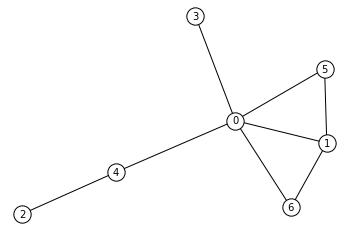

2


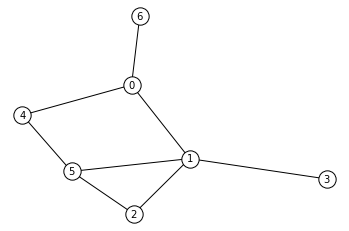

3


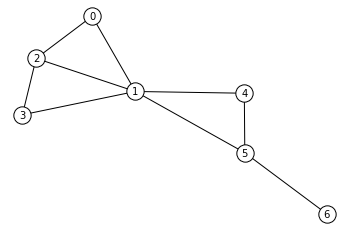

4


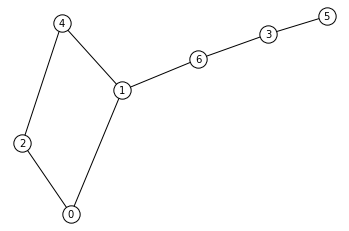

5


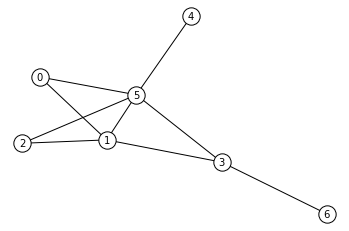

6


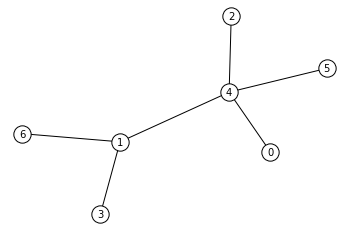

7


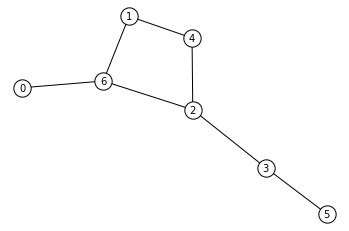

In [3]:
graphs = graph_Graph.objects.filter(total_vertices=total_vertices)
for idx, graph in enumerate(graphs):
    # plot graph
    adjacency_map = graph.adjacency
    gt.get_plot(adjacency_map, directed=False)
    print(graph.id)
    plt.show()

In [4]:
# Choose graph to read out
graph_id = 4

In [5]:
for idx, experiment in enumerate(experiment_Experiment.objects.filter(graph_id = graph_id)):
    print(experiment.id)
    print(experiment)

4
Experiment[Base](machine=Advantage_system1.1, settings={'annealing_time': 800, 'answer_mode': 'raw', 'auto_scale': True, 'num_reads': 1000, 'num_spin_reversal_transforms': 0, 'readout_thermalization': 0, 'programming_thermalization': 1000, 'chain_strength': 4.0}, settings_hash=c8327d223192b2143cc7e5950cb42e72, p=2.00, chain_strength=4.0, tag=FixEmbedding_Binary_0_0_z0)


In [6]:
# Choose experiment parameters
experiment_id = 4

In [15]:
# Print QUBO and Ising
penalty = float(experiment_Experiment.objects.get(id=experiment_id).p)
adjacency_map = {tuple(edge) for edge in graph_Graph.objects.get(id = graph_id).adjacency}
qubo = get_mds_qubo(adjacency_map, penalty=penalty, directed=False, triangularize=True, dtype="d")
print("QUBO formulation")
print(qubo.todense())
J, h, C = QUBO_to_Ising(qubo.todense().tolist())
print("Ising formulation")
print(J)
print(h)
print(C)
#data_Data.objects.filter(experiment_id = experiment_id)

QUBO formulation
[[-5.  8.  8.  0.  8.  0.  4. -4. -8. -4. -8. -4. -8.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. -7.  8.  4.  8.  0.  8. -4. -8. -4. -8.  0.  0.  0.  0. -4. -8.  0.
  -4. -8.]
 [ 0.  0. -5.  0.  8.  0.  0. -4. -8.  0.  0. -4. -8.  0.  0. -4. -8.  0.
   0.  0.]
 [ 0.  0.  0. -5.  0.  8.  8.  0.  0.  0.  0.  0.  0. -4. -8.  0.  0. -4.
  -4. -8.]
 [ 0.  0.  0.  0. -5.  0.  4.  0.  0. -4. -8. -4. -8.  0.  0. -4. -8.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0. -3.  4.  0.  0.  0.  0.  0.  0. -4. -8.  0.  0. -4.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0. -5.  0.  0. -4. -8.  0.  0. -4. -8.  0.  0.  0.
  -4. -8.]
 [ 0.  0.  0.  0.  0.  0.  0.  6.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 16.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  8.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 16.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6